Catherine and Derrick

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Reservations(train).csv')
df_test = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Reservation(test).csv')

In [ ]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [ ]:
df.columns


Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
features = ['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [ ]:
df.dtypes

id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [ ]:
df.size

799900

In [ ]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

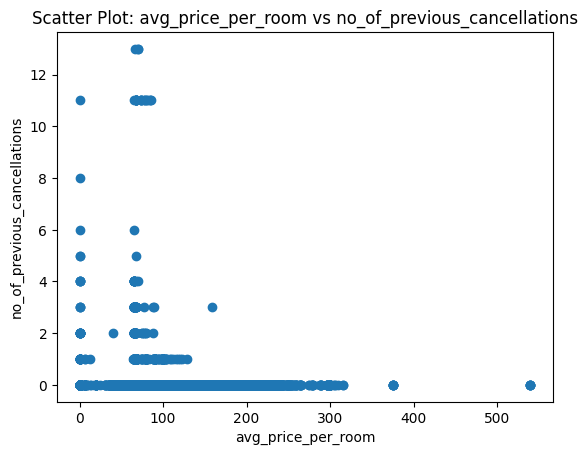

Correlation Coefficient: -0.0669164229133831


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['avg_price_per_room', 'no_of_previous_cancellations']

selected_data = df[selected_columns]

plt.scatter(selected_data['avg_price_per_room'], selected_data['no_of_previous_cancellations'])
plt.title('Scatter Plot: avg_price_per_room vs no_of_previous_cancellations')
plt.xlabel('avg_price_per_room')
plt.ylabel('no_of_previous_cancellations')
plt.show()

correlation_coefficient = selected_data.corr().iloc[0, 1]
print(f'Correlation Coefficient: {correlation_coefficient}')


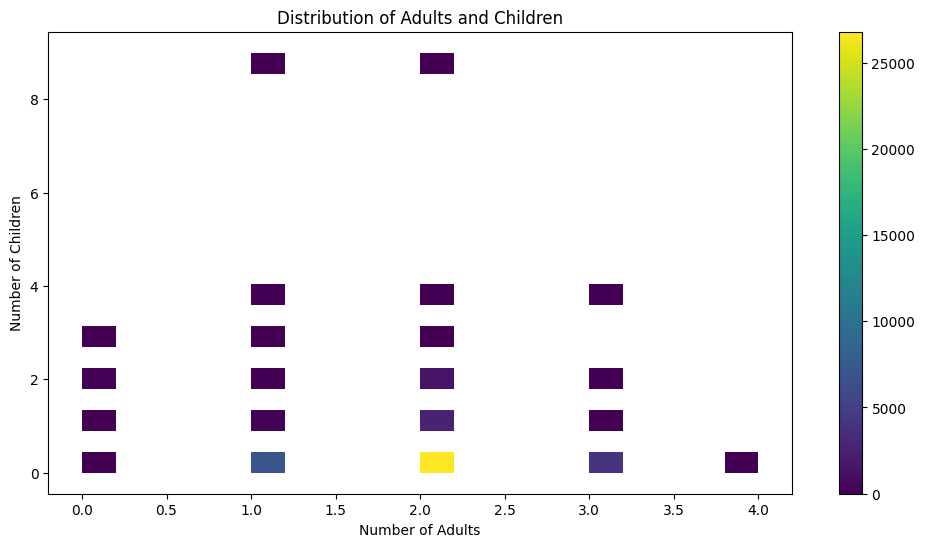

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='no_of_adults', y='no_of_children', bins=20, cmap='viridis', cbar=True)
plt.title('Distribution of Adults and Children')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Children')
plt.show()


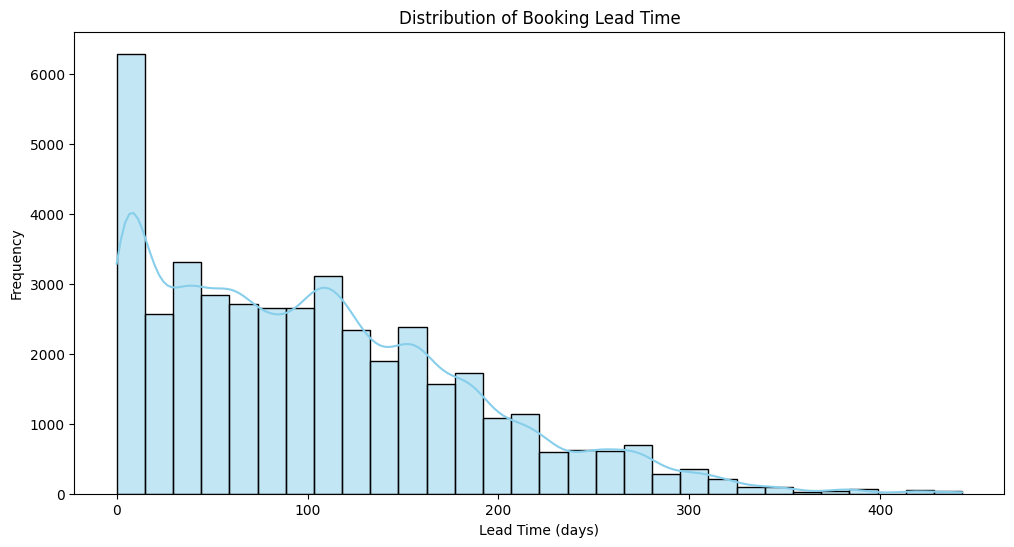

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


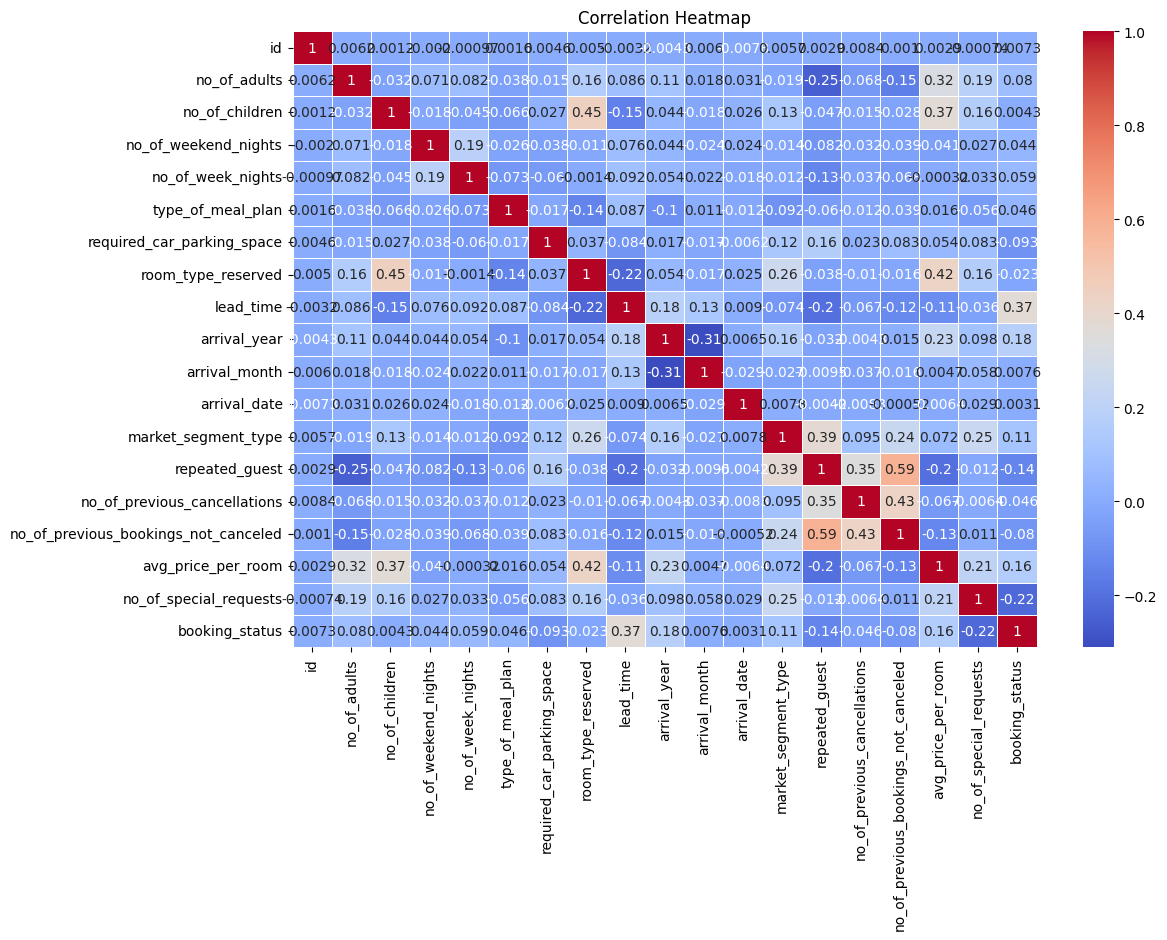

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


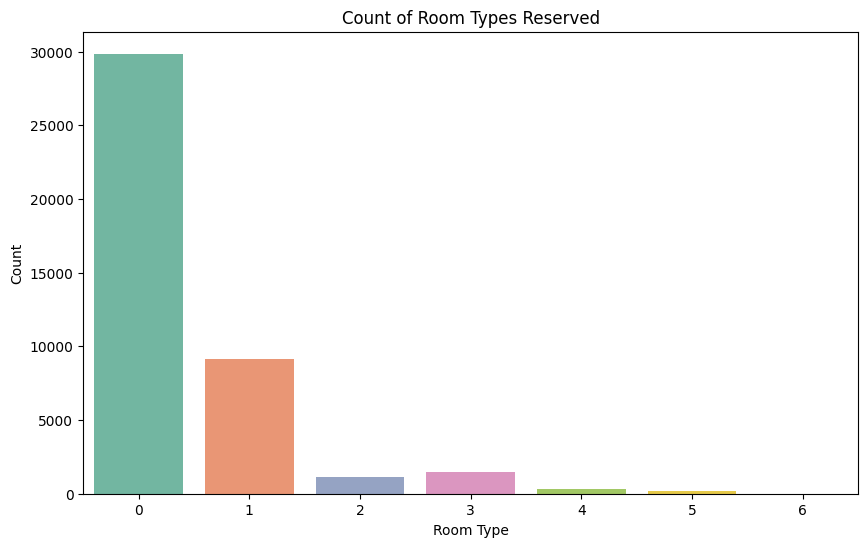

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type_reserved', palette='Set2')
plt.title('Count of Room Types Reserved')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


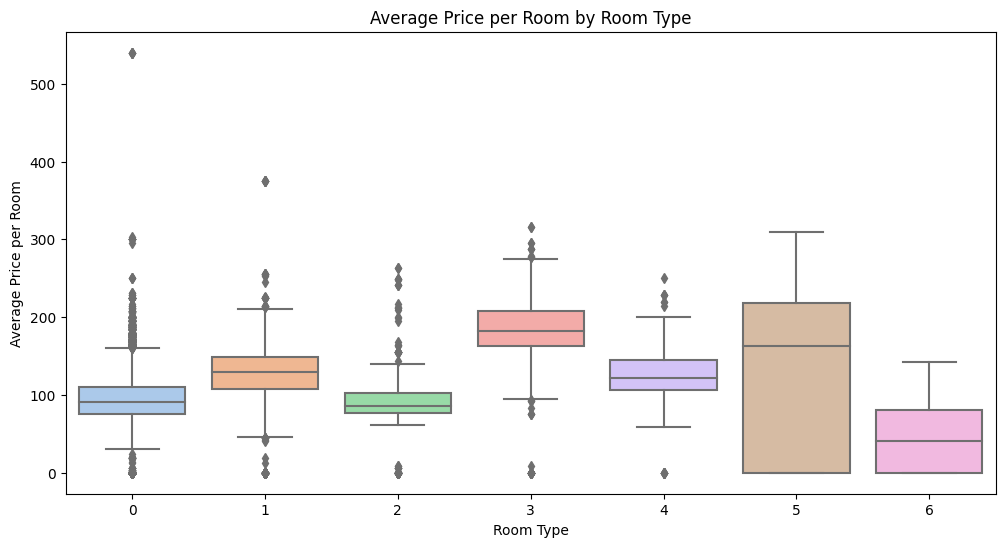

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='room_type_reserved', y='avg_price_per_room', palette='pastel')
plt.title('Average Price per Room by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price per Room')
plt.show()


In [ ]:
#Help from Chat
import pandas as pd

df['combined_date'] = df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_date'].astype(str)

df['combined_date'] = pd.to_datetime(df['combined_date'], errors='coerce')

df['day_of_week'] = df['combined_date'].dt.day_name()

print(df[['combined_date', 'day_of_week']])

busy_days = df['day_of_week'].value_counts().index[:5]

print(f'\nTop 5 busiest days:')
print(busy_days)


      combined_date day_of_week
0        2018-01-14      Sunday
1        2018-07-29      Sunday
2        2018-12-02      Sunday
3        2018-12-01    Saturday
4        2018-10-16     Tuesday
...             ...         ...
42095    2018-12-30      Sunday
42096    2017-09-23    Saturday
42097    2018-07-21    Saturday
42098    2018-11-09      Friday
42099    2017-10-26    Thursday

[42100 rows x 2 columns]

Top 5 busiest days:
Index(['Sunday', 'Wednesday', 'Saturday', 'Tuesday', 'Monday'], dtype='object')


In [ ]:
X = df[features]
y = df['booking_status']

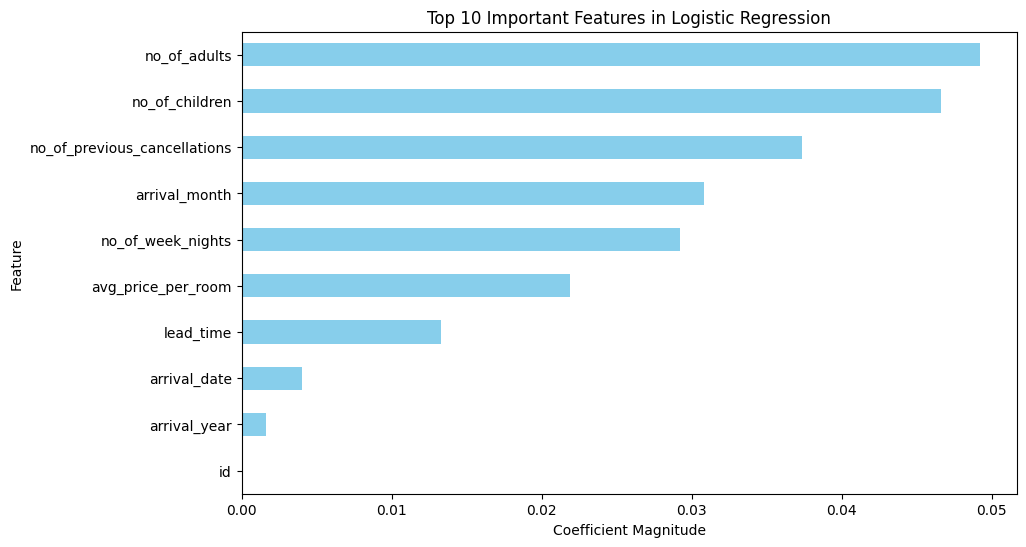

In [ ]:
# Help from Chat
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(class_weight='balanced', max_iter=1000)

lr.fit(X_train, y_train)

feature_importance = pd.Series(lr.coef_[0], index=X.columns)

sorted_feature_importance = feature_importance.abs().sort_values(ascending=True)

top_n = 10
plt.figure(figsize=(10, 6))
sorted_feature_importance[:top_n].plot(kind='barh', color='skyblue')
plt.title('Top {} Important Features in Logistic Regression'.format(top_n))
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with balanced class weights
lr = LogisticRegression(class_weight='balanced')

# Define the columns you want to encode
columns_to_encode = ['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

# Create an OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Encode the categorical features for the training set
X_train_encoded = encoder.fit_transform(X_train[columns_to_encode]).toarray()

# Train the model on the training data
lr.fit(X_train_encoded, y_train)

# Encode the categorical features for the testing set
X_test_encoded = encoder.transform(X_test[columns_to_encode]).toarray()

# Make predictions on the test data
y_pred = lr.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8125890736342043


In [ ]:
X_test_encoded = encoder.transform(df_test[['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]).toarray()

y_pred_test = lr.predict(X_test_encoded)

kaggle = pd.DataFrame({
    'id': df_test['id'],
    'booking_status': (y_pred_test > 0.5).astype(float)
})

kaggle.to_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Reservations_predictions.csv', index=False)


In [ ]:
# Print the top N important features as a list
top_n_features_list = sorted_feature_importance[:top_n].index.tolist()
print("Top {} Important Features:".format(top_n))
print(top_n_features_list)


Top 10 Important Features:
['id', 'arrival_year', 'arrival_date', 'lead_time', 'avg_price_per_room', 'no_of_week_nights', 'arrival_month', 'no_of_previous_cancellations', 'no_of_children', 'no_of_adults']


In [ ]:
'''
columns_to_encode = ['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

Accuracy: 0.8125890736342043
Kaggle: 0.81975


columns_to_encode = ['id', 'arrival_year', 'arrival_date', 'lead_time', 'avg_price_per_room',
        'no_of_week_nights', 'arrival_month', 'no_of_previous_cancellations', 'no_of_children', 'no_of_adults']

Accuracy: 0.7589073634204275
Kaggle: 0.75575
'''


"\ncolumns_to_encode = ['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',\n       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',\n       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',\n       'arrival_date', 'market_segment_type', 'repeated_guest',\n       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',\n       'avg_price_per_room', 'no_of_special_requests']\n\nAccuracy: 0.8125890736342043\nKaggle: 0.81975\n\n\ncolumns_to_encode = ['id', 'arrival_year', 'arrival_date', 'lead_time', 'avg_price_per_room', \n        'no_of_week_nights', 'arrival_month', 'no_of_previous_cancellations', 'no_of_children', 'no_of_adults']\n\nAccuracy: 0.7589073634204275\nKaggle: 0.75575\n"